# Asset Data

In [1]:
import ast
import numpy as np
import pandas as pd
from warnings import filterwarnings
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint

from src.contract_export import contract_query
from config import CONTRACT_ADDRESSES, NODE_LCD_URLS

filterwarnings('ignore')
tqdm.pandas()

## load data

In [2]:
assets_df = pd.read_csv('data_csv/all_assets.csv', index_col=0)
assets_df['channels'] = assets_df.channels.map(lambda x: ast.literal_eval(x) if type(x) == str else None)
assets_df['denom_units'] = assets_df.denom_units.map(
    lambda x: ast.literal_eval(x) if type(x) == str else None)
assets_df

,chain_name,chain_id,denom,type_asset,supply,description,denom_units,display,name,symbol,...,denom_base,type_asset_base,path,channels,chain_id_counterparty,channel_id_counterparty,supply_base,chain_id_base,one_channel,admin
0,cronos,cronosmainnet_25-1,ibc/0FD310E1160487D42B93949F1D8955C7EF6D88B1BF...,ics20,1,NaN,None,NaN,NaN,NaN,...,acanto,sdk.coin,transfer/channel-9,[channel-9],canto_7700-1,channel-22,1053766126073740788887848383,canto_7700-1,True,NaN
1,cronos,cronosmainnet_25-1,ibc/11DFDFADE34DCE439BA732EBA5CD8AA804A544BA1E...,ics20,972901,Irishub staking token,"[{'denom': 'uiris', 'exponent': 0, 'aliases': ...",iris,NaN,NaN,...,uiris,sdk.coin,transfer/channel-8,[channel-8],irishub-1,channel-66,2154742054210859,irishub-1,True,NaN
2,cronos,cronosmainnet_25-1,ibc/2114969D9A69DD3F8529975297CA38AF474E34305D...,ics20,2,NaN,None,NaN,NaN,NaN,...,ucre,sdk.coin,transfer/channel-6,[channel-6],crescent-1,channel-39,375487767335625,crescent-1,True,NaN
3,cronos,cronosmainnet_25-1,ibc/4294C3DB67564CF4A0B2BFACC8415A59B38243F6FF...,ics20,1000000,The native stable token of the Terra Columbus.,"[{'denom': 'uusd', 'exponent': 0, 'aliases': [...",usd,USD TERRA,UST,...,uusd,sdk.coin,transfer/channel-2,[channel-2],columbus-5,channel-22,9795903806583938,columbus-5,True,NaN
4,cronos,cronosmainnet_25-1,ibc/4DAE26570FD24ABA40E2BE4137E39D946C78B00B24...,ics20,656514069413,NaN,None,NaN,NaN,NaN,...,uakt,sdk.coin,transfer/channel-4,[channel-4],akashnet-2,channel-40,216395373037540,akashnet-2,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11983,terra2,phoenix-1,cw20:terra17gck626vgax9jpe6utm7dhx4vdzawfkt0jh...,cw20,93000000000000,NaN,"[{'denom': 'dust', 'exponent': 6, 'aliases': [...",NaN,Depegged UST,dUST,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
11984,terra2,phoenix-1,cw20:terra17aj4ty4sz4yhgm08na8drc0v03v2jwr3wax...,cw20,1411977582018,NaN,"[{'denom': 'bluna', 'exponent': 6, 'aliases': ...",NaN,boneLuna,bLUNA,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
11985,terra2,phoenix-1,cw20:terra1xzkel96e5e8vfmqw7valzdzzv9hqasfyslc...,cw20,6564511713902,NaN,"[{'denom': 'local', 'exponent': 6, 'aliases': ...",NaN,Local Terra Token (Wormhole),LOCAL,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
11986,terra2,phoenix-1,cw20:terra14xsm2wzvu7xaf567r693vgfkhmvfs08l68h...,cw20,351628704448,NaN,"[{'denom': 'lunax', 'exponent': 6, 'aliases': ...",NaN,Stader LunaX Token,LunaX,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


## charts

In [3]:
def aggregate_pie_plot(assets_df: pd.DataFrame, agg_column: str, n: int = 8, object_name: str = 'items') -> pd.Series:
    assets_by_item_row = assets_df.groupby(agg_column)['denom'].agg(np.count_nonzero).sort_values(ascending=False)
    assets_by_item = assets_by_item_row.head(n)
    if len(assets_by_item_row) > n:
        assets_by_item[f'remaining {len(assets_by_item_row) - n} {object_name}'] = sum(assets_by_item_row[n:])
    return assets_by_item

In [4]:
assets_by_chain = aggregate_pie_plot(assets_df=assets_df, agg_column='chain_name', object_name='chains\n', n=7)
assets_by_type_asset = aggregate_pie_plot(assets_df=assets_df, agg_column='type_asset')
assets_by_denom_base = aggregate_pie_plot(assets_df=assets_df, agg_column='denom_base', object_name='base denoms\n', n=7)
total_assets = len(assets_df)

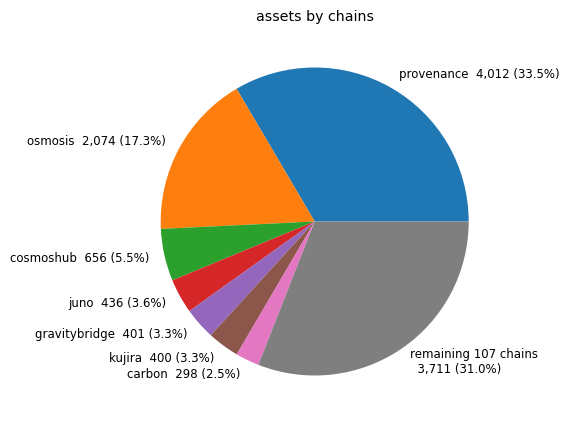

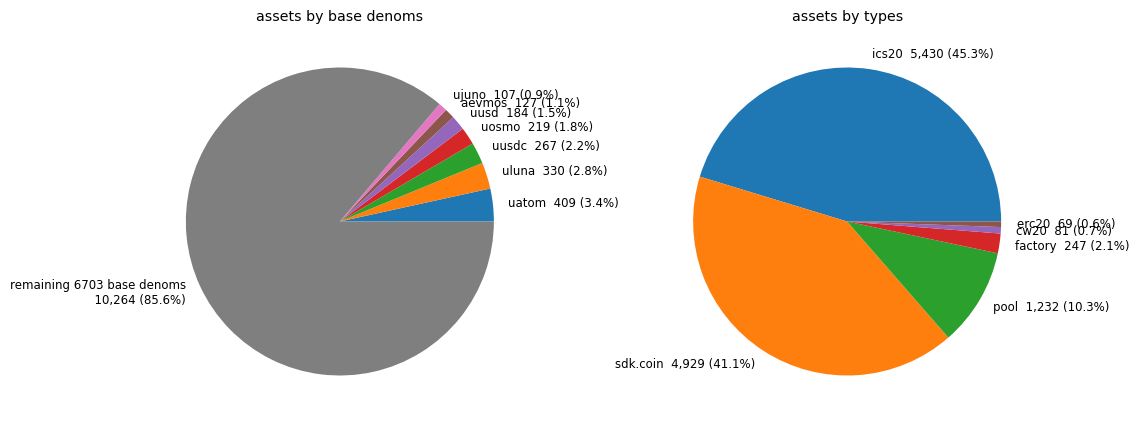

In [5]:
chain_labels = [f'{_chain_name}  {assets_by_chain[_chain_name]:>,.0f} ({assets_by_chain[_chain_name] / total_assets:.1%})'
                for _chain_name in assets_by_chain.keys()]
type_asset_labels = [f'{_type_asset}  {assets_by_type_asset[_type_asset]:>,.0f} ({assets_by_type_asset[_type_asset] / total_assets:.1%})'
                     for _type_asset in assets_by_type_asset.keys()]
denom_base_labels = [f'{_denom_base}  {assets_by_denom_base[_denom_base]:>,.0f} ({assets_by_denom_base[_denom_base] / total_assets:.1%})'
                     for _denom_base in assets_by_denom_base.keys()]

plt.rcParams.update({'font.size': 8.5})

mpl.rcParams['figure.figsize'] = (7.0, 5.0)
fig1, ax1 = plt.subplots(ncols=1, nrows=1)
ax1.pie(assets_by_chain, labels=chain_labels)
ax1.set_title(label='assets by chains')
fig1.savefig('src/img/chart__assets_by_chains.png')

mpl.rcParams['figure.figsize'] = (12.0, 5.0)
fig2, [ax3, ax2] = plt.subplots(ncols=2, nrows=1)
ax2.pie(assets_by_type_asset, labels=type_asset_labels)
ax2.set_title(label='assets by types')
ax3.pie(assets_by_denom_base, labels=denom_base_labels)
ax3.set_title(label='assets by base denoms')
fig2.savefig('src/img/chart__assets_by_base_denoms_and_types.png')

plt.show()

## contract query

In [6]:
CONTRACT_CHAIN = 'bostrom'

pprint(
    contract_query(
        query={'get_chain': {'chain_name': 'bostrom'}},
        contract_address=CONTRACT_ADDRESSES[CONTRACT_CHAIN],
        node_lcd_url=NODE_LCD_URLS[CONTRACT_CHAIN]
    )
)

{'data': {'assets': [{'address': None,
                      'admin': None,
                      'base': 'boot',
                      'chain_id': 'bostrom',
                      'chain_name': 'bostrom',
                      'coingecko_id': None,
                      'denom_units': [{'aliases': ['BOOT'],
                                       'denom': 'boot',
                                       'exponent': 0}],
                      'description': 'The staking token of Bostrom',
                      'display': 'boot',
                      'ibc': None,
                      'images': None,
                      'keywords': None,
                      'logo_uris': None,
                      'name': 'Bostrom Boot',
                      'supply': '1157021196068624',
                      'symbol': 'BOOT',
                      'traces': None,
                      'type_asset': 'sdk.coin'},
                     {'address': None,
                      'admin': None,
             

In [7]:
pprint(
    contract_query(
        query={'get_all_assets': {'limit': 5}},
        contract_address=CONTRACT_ADDRESSES[CONTRACT_CHAIN],
        node_lcd_url=NODE_LCD_URLS[CONTRACT_CHAIN]
    )
)

{'data': {'entries': [{'address': None,
                       'admin': None,
                       'base': 'ibc/4A3AAD07BC4EBEBC10FC2560EAA3B7A1D3B541B5264ED8E5E13E6B74AC76127B',
                       'chain_id': 'eightball-1',
                       'chain_name': '8ball',
                       'coingecko_id': None,
                       'denom_units': [{'aliases': [],
                                        'denom': 'uosmo',
                                        'exponent': 0},
                                       {'aliases': [],
                                        'denom': 'osmo',
                                        'exponent': 6}],
                       'description': 'The native token of Osmosis',
                       'display': 'osmo',
                       'ibc': {'base_supply': None,
                               'dst_channel': 'channel-641',
                               'source_channel': 'channel-16',
                               'source_denom': 'uosmo

In [8]:
pprint(
    contract_query(
        query={'get_asset': {'chain_name': 'osmosis', 'base': 'uosmo'}},
        contract_address=CONTRACT_ADDRESSES[CONTRACT_CHAIN],
        node_lcd_url=NODE_LCD_URLS[CONTRACT_CHAIN]
    )
)

{'data': {'asset': {'address': None,
                    'admin': None,
                    'base': 'uosmo',
                    'chain_id': 'osmosis-1',
                    'chain_name': 'osmosis',
                    'coingecko_id': None,
                    'denom_units': [{'aliases': [],
                                     'denom': 'uosmo',
                                     'exponent': 0},
                                    {'aliases': [],
                                     'denom': 'osmo',
                                     'exponent': 6}],
                    'description': 'The native token of Osmosis',
                    'display': 'osmo',
                    'ibc': None,
                    'images': None,
                    'keywords': None,
                    'logo_uris': None,
                    'name': None,
                    'supply': '608564335844717',
                    'symbol': None,
                    'traces': None,
                    'type_asset':